# Student Performance Indicator

## LifeCycle Of The ML Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- EDA (Exploratory Data Analysis)
- Data Preprocessing
- Model Training
- Choosing the Best Model

### 1) Problem Statement

#### This project's goal is to analyze and understand how student's performance is affected by the factors such as gender, ethnicity, parental level of education, lunch and test preparation course.

### 2) Data Collection

#### Dataset Souce -> https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
#### This dataset consists of 1000 rows and 8 columns

### 2.1 Import Data and Required Packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../../data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3) Data Checks

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No missing values

In [7]:
df.duplicated().sum()

np.int64(0)

#### No duplicates

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### All means and standart deviations are close to each other
#### While there is a min score 0 for math, for writing min is much higher (10) and for reading (17)

In [14]:
# Defining numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"There are {len(numeric_features)} features: {numeric_features}")
print(f"There are {len(categorical_features)} features: {categorical_features}")

There are 5 features: ['math score', 'reading score', 'writing score', 'total_score', 'average']
There are 5 features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
# Adding columns for total score and average
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_fullScore = df[df['reading score'] == 100]['average'].count()
writing_fullScore = df[df['writing score'] == 100]['average'].count()
math_fullScore = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full marks in reading: {reading_fullScore}")
print(f"Number of students with full marks in writing: {writing_fullScore}")
print(f"Number of students with full marks in maths: {math_fullScore}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in maths: 7


In [17]:
reading_less20 = df[df['reading score'] <= 20]['average'].count()
writing_less20 = df[df['writing score'] <= 20]['average'].count()
math_less20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in reading: {reading_less20}")
print(f"Number of students with less than 20 marks in writing: {writing_less20}")
print(f"Number of students with less than 20 marks in maths: {math_less20}")

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in maths: 4


#### - Worst Performance is in Maths
#### - Best Performance is in Reading

### 4) Data Visualization

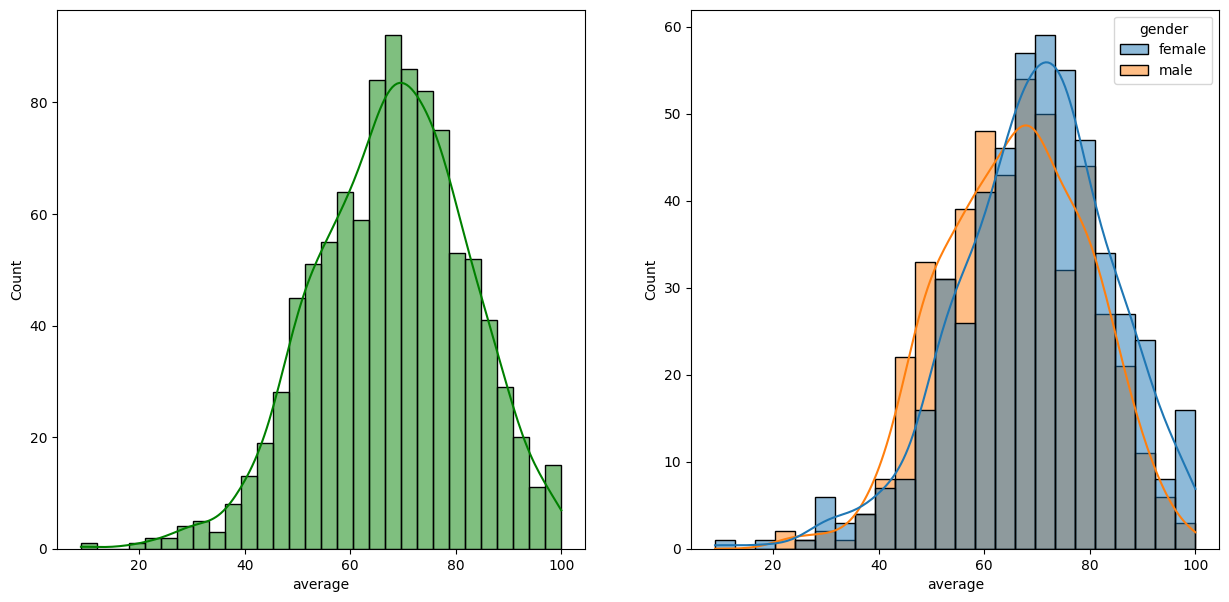

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#### Female students tend to perform well than male students

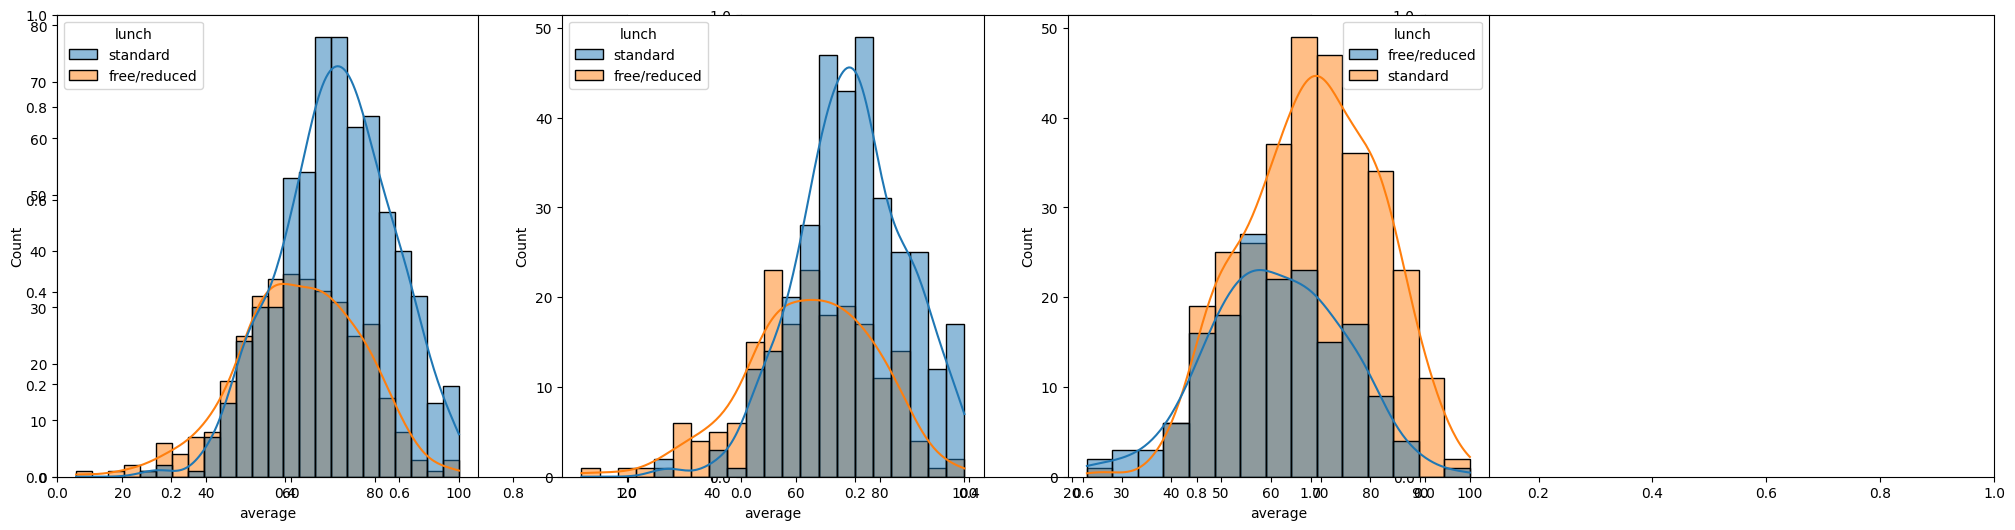

In [21]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Standart lunch helps perform well in the exams

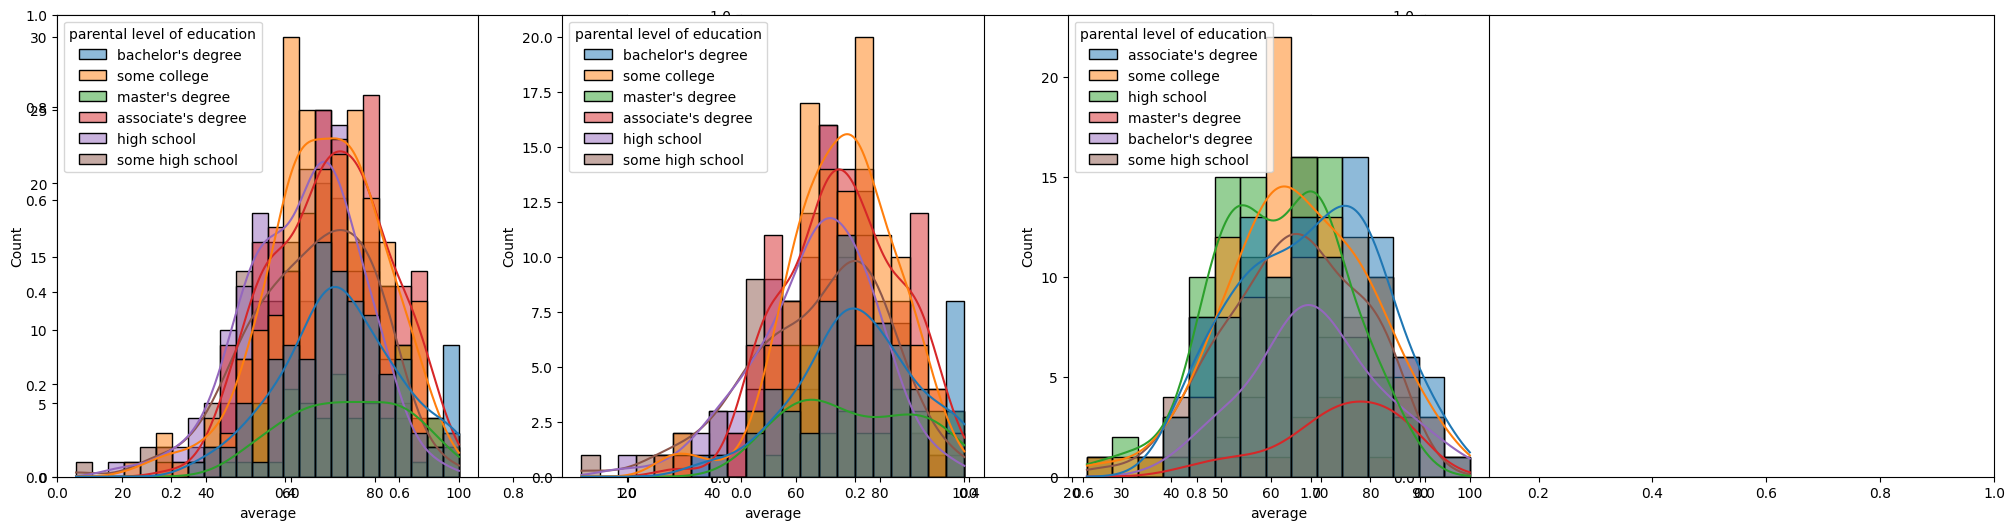

In [22]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

#### In general parent's education doesn't effect student's exam results

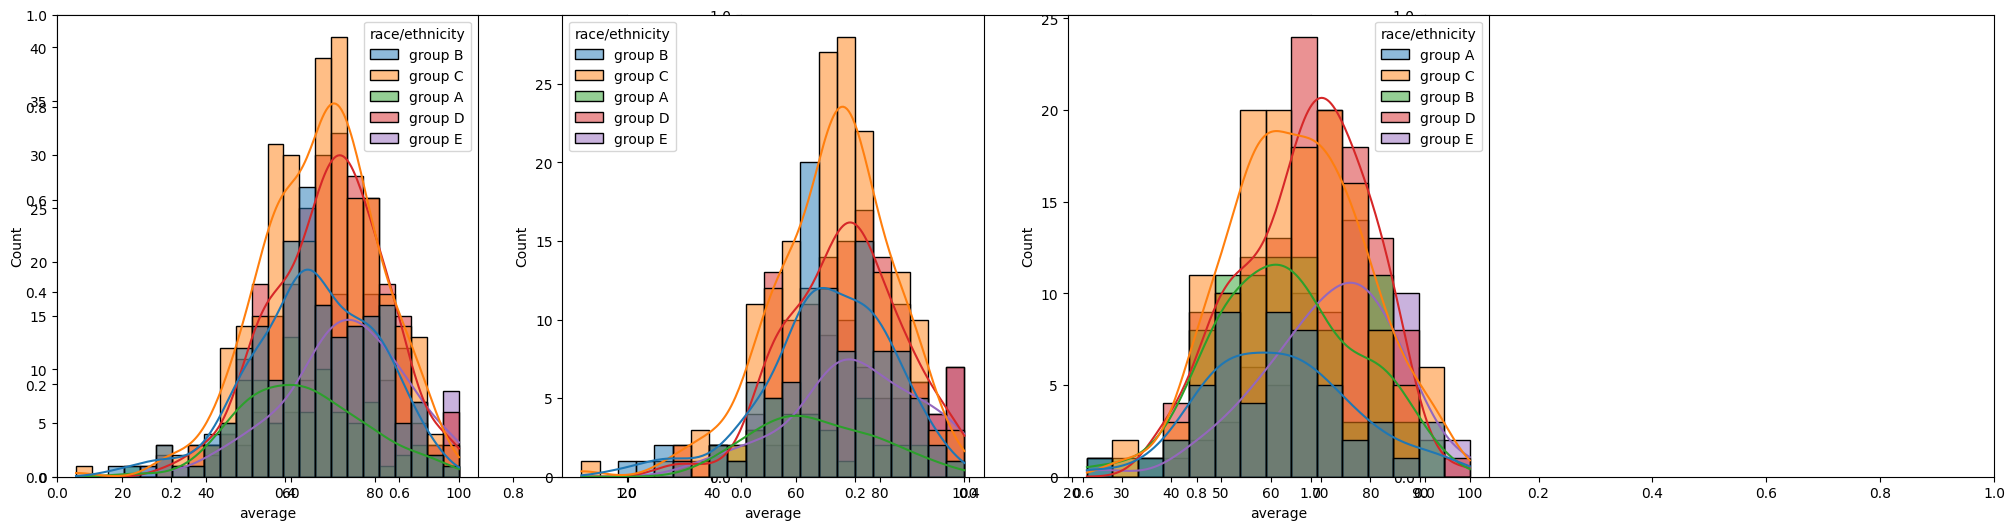

In [23]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Students from group A and group B tends to perform poorly in exam

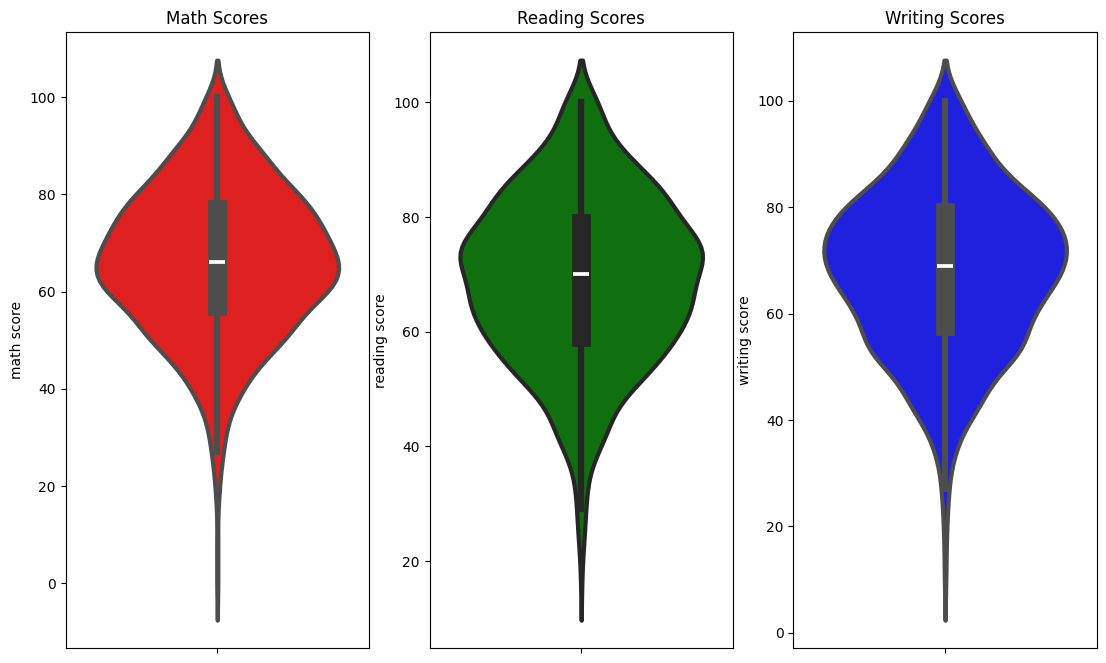

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(data=df,y='reading score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(data=df,y='writing score',color='blue',linewidth=3)
plt.show()

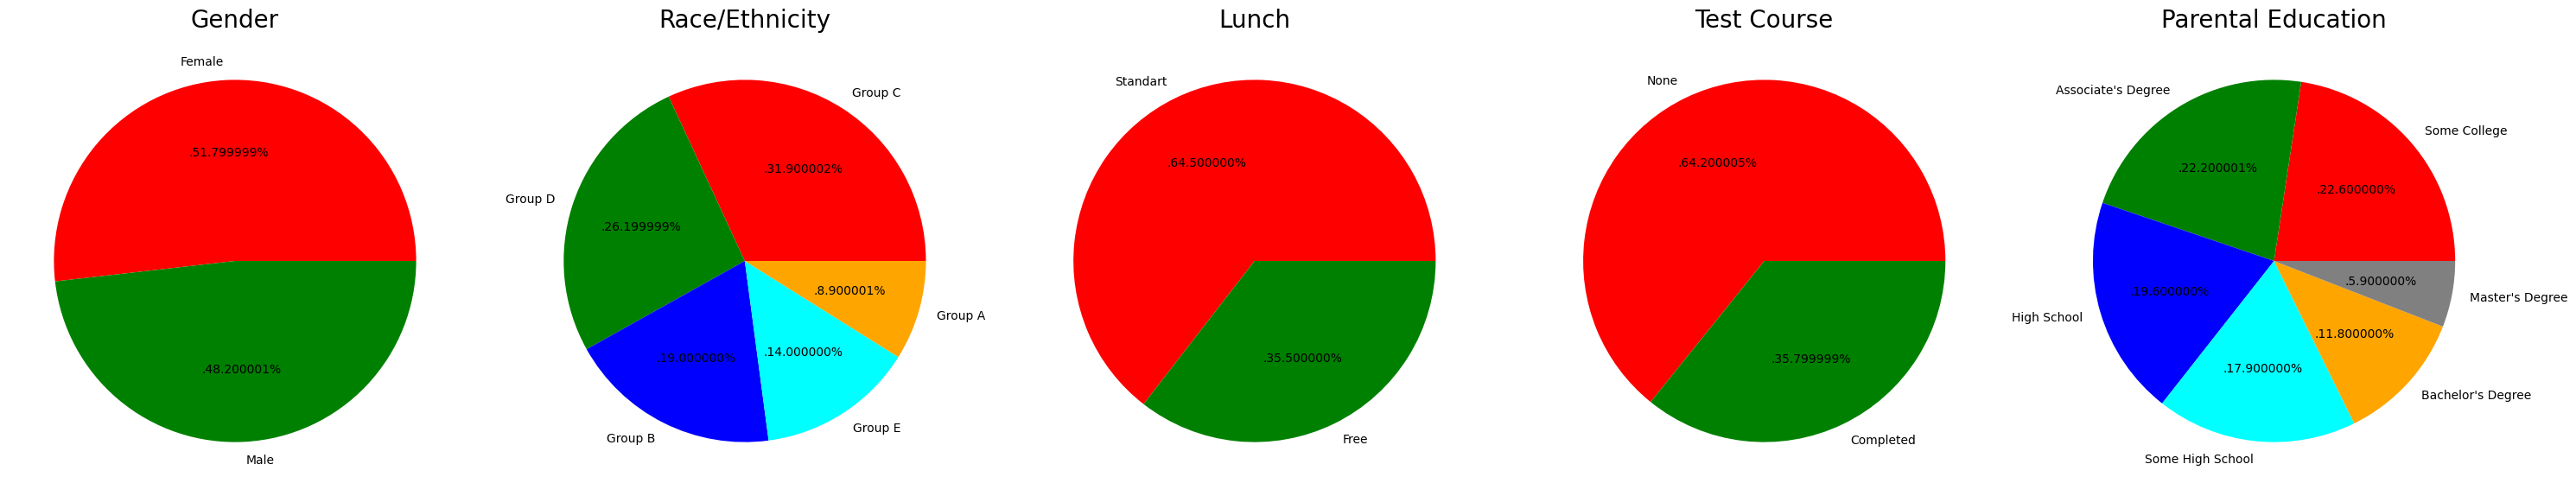

In [28]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels='Standart','Free' 
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels='None','Completed' 
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels='Some College',"Associate's Degree", 'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Univariate Analysis (Distribution of Gender)

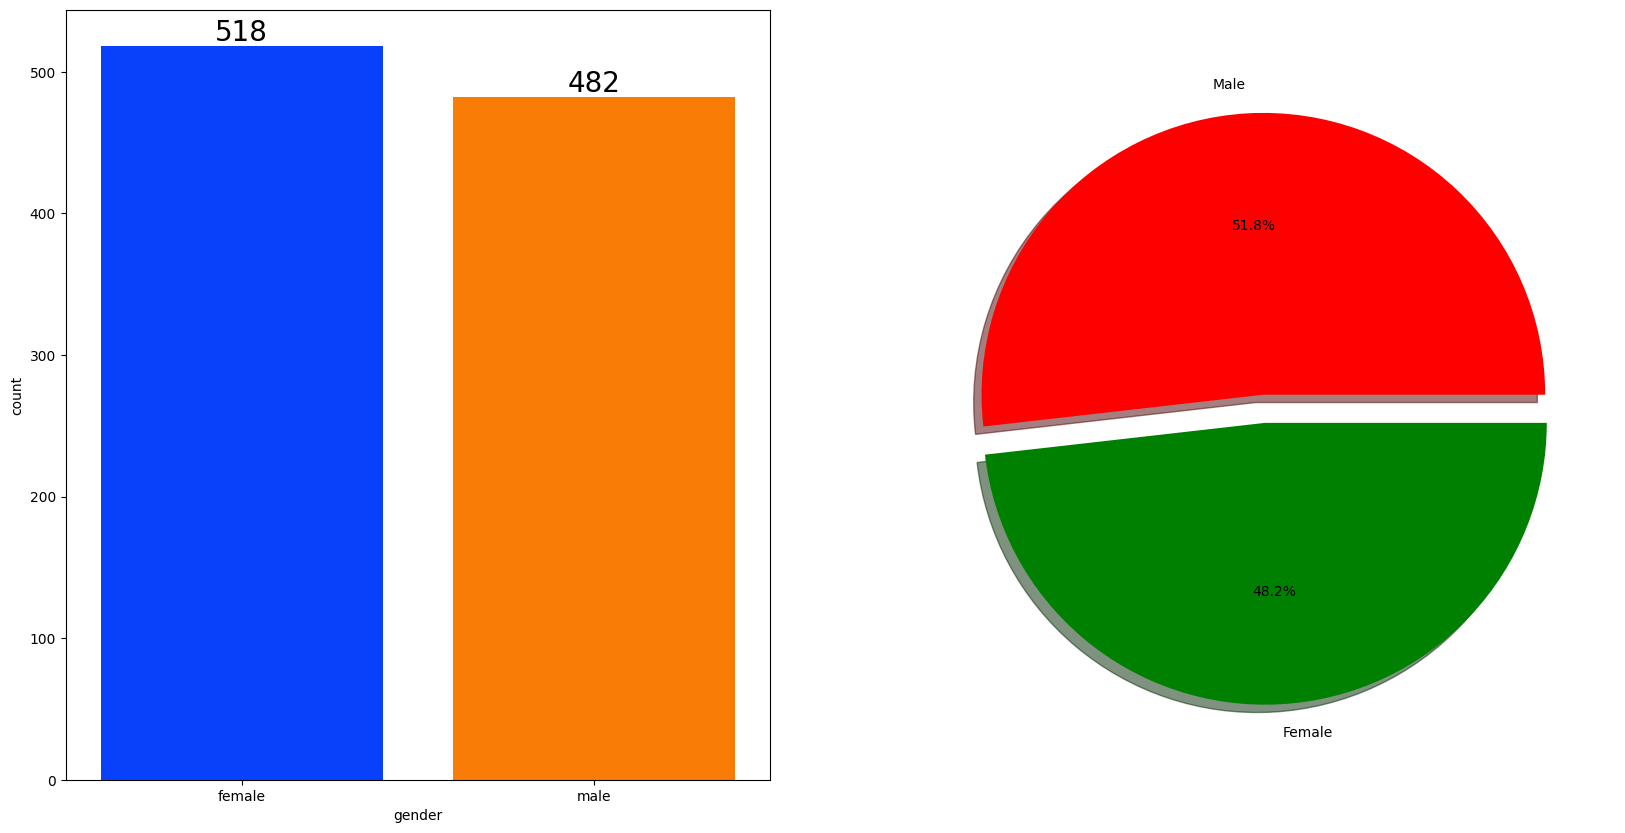

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

### Bivariate Analysis (Impact of Gender on Performance)

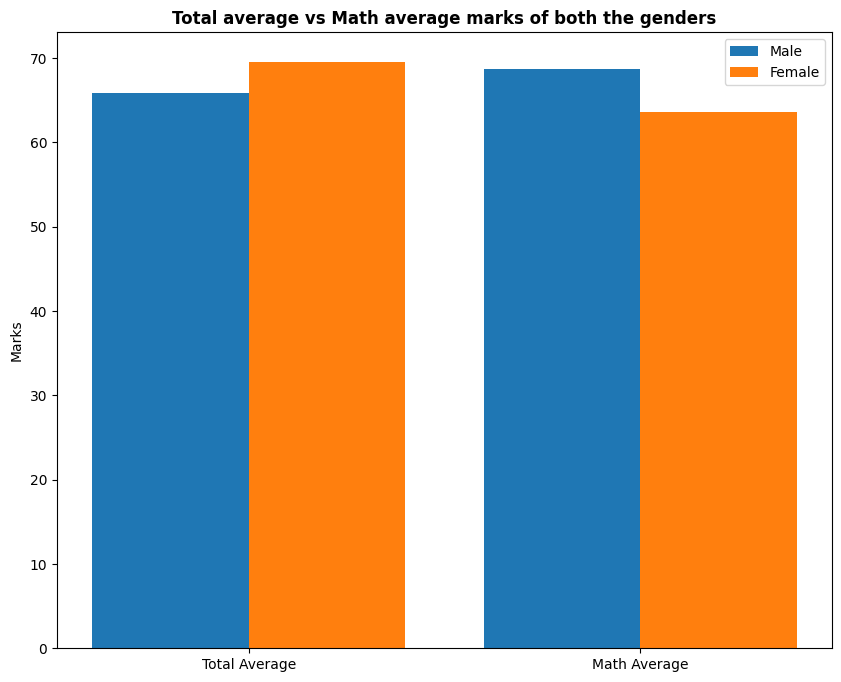

In [37]:
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10,8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'].iloc[0], gender_group['math score'].iloc[0]]
male_scores   = [gender_group['average'].iloc[1], gender_group['math score'].iloc[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders",fontweight='bold')
plt.legend()
plt.show()

#### On average females have a better overall score than man
#### However males have scored higher in Maths

### Univariate Analysis (Distribution of Races)

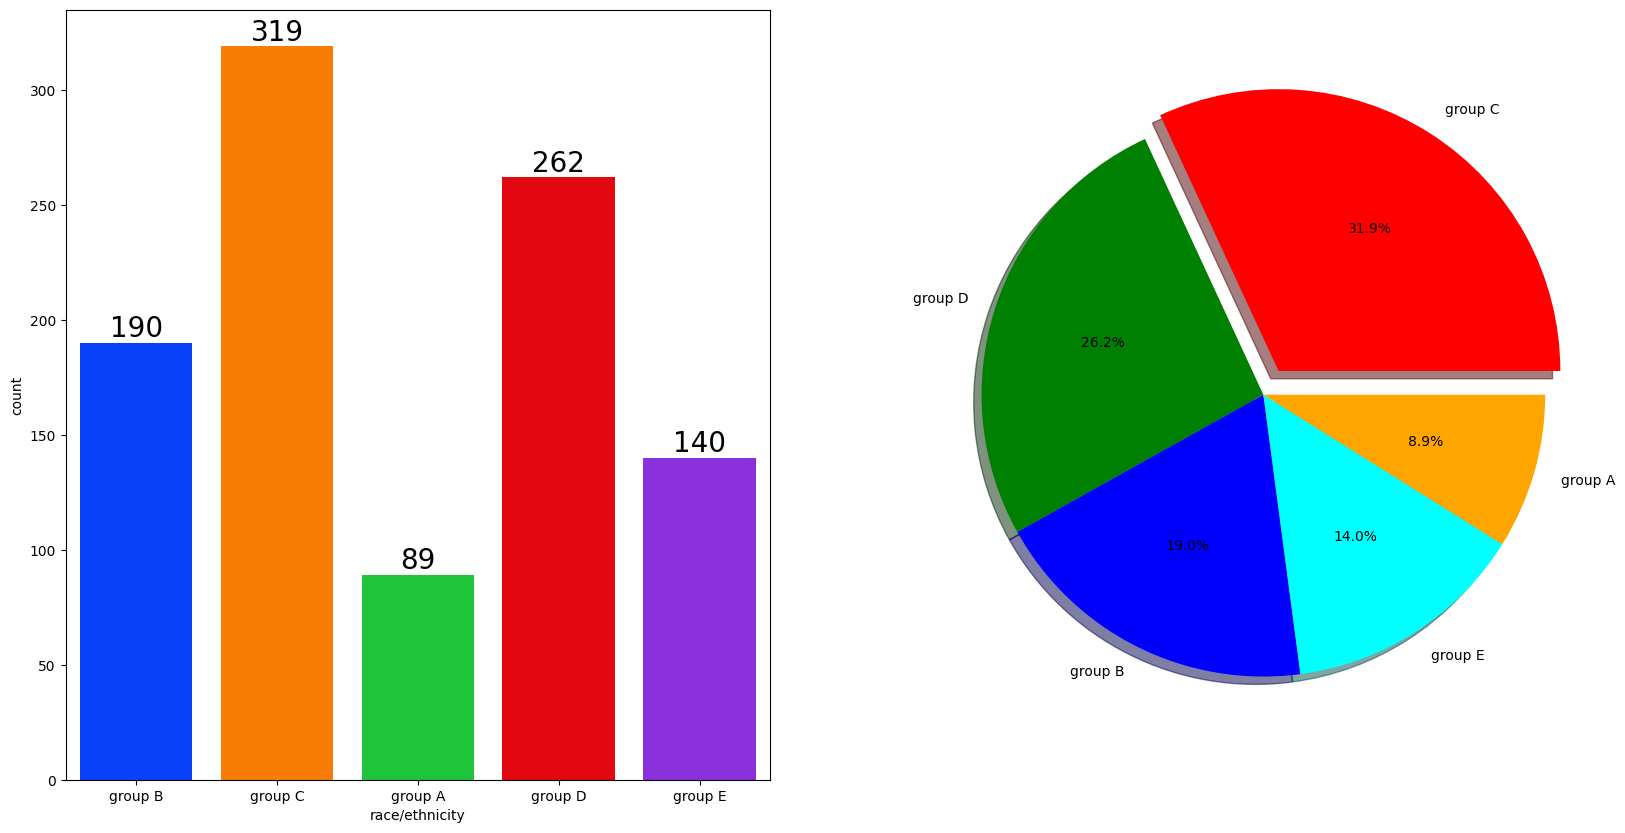

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['red','green','blue','cyan','orange'])
plt.show()

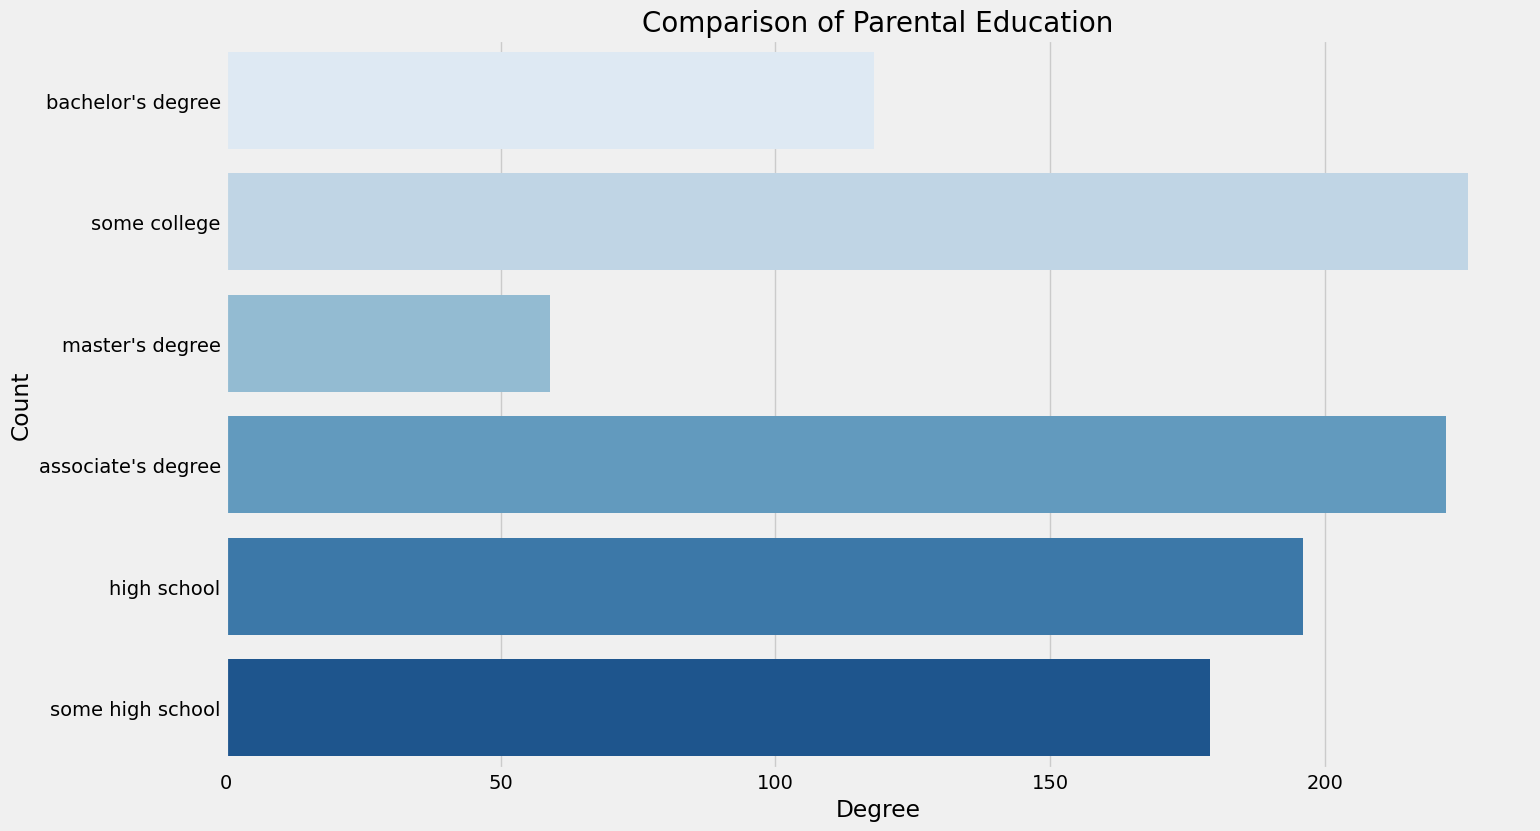

In [39]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Largest number of parents are from some college

### Bivariate Analysis (Impact of Parental Education on Performance)

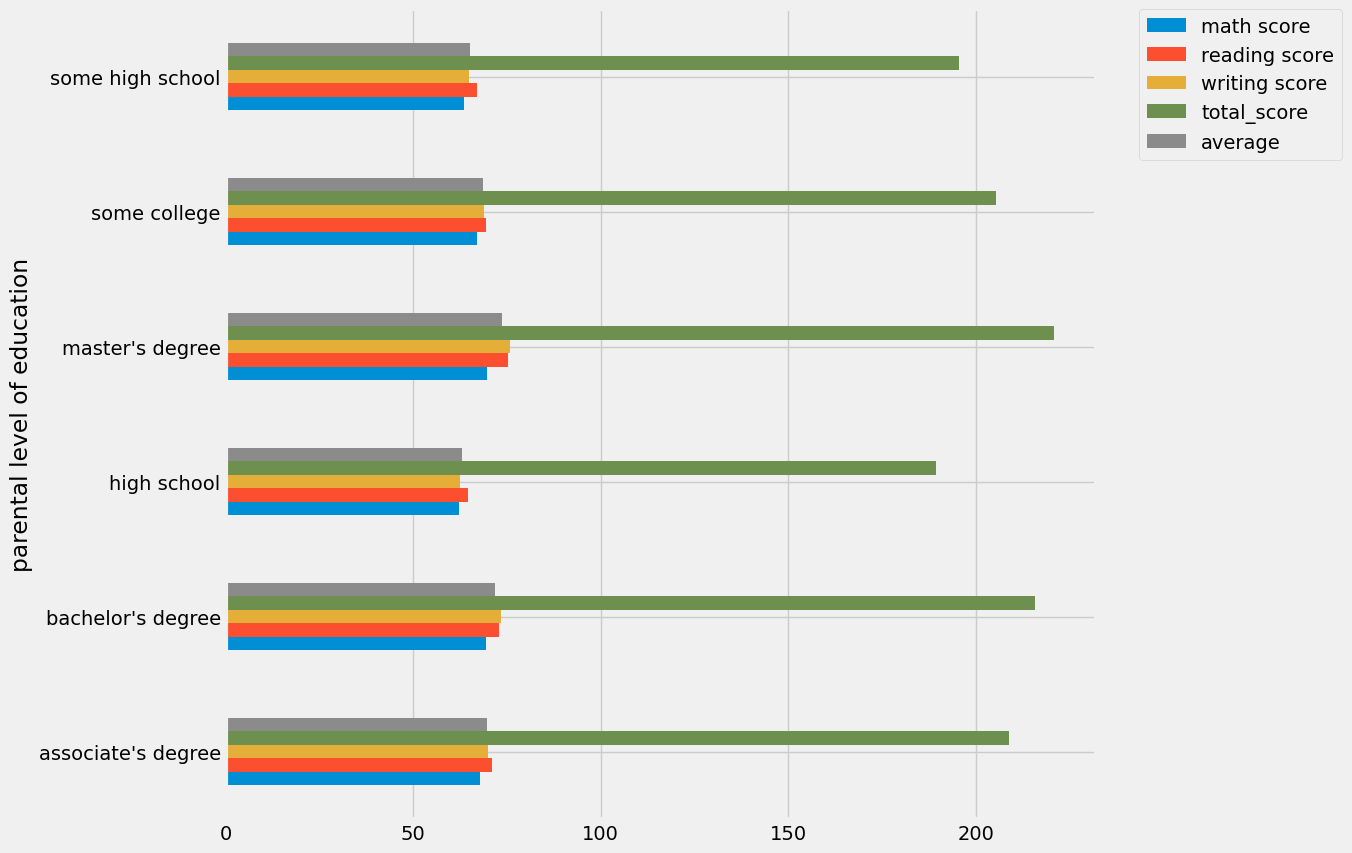

In [42]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

### Univariate Analysis (Type of Lunch)

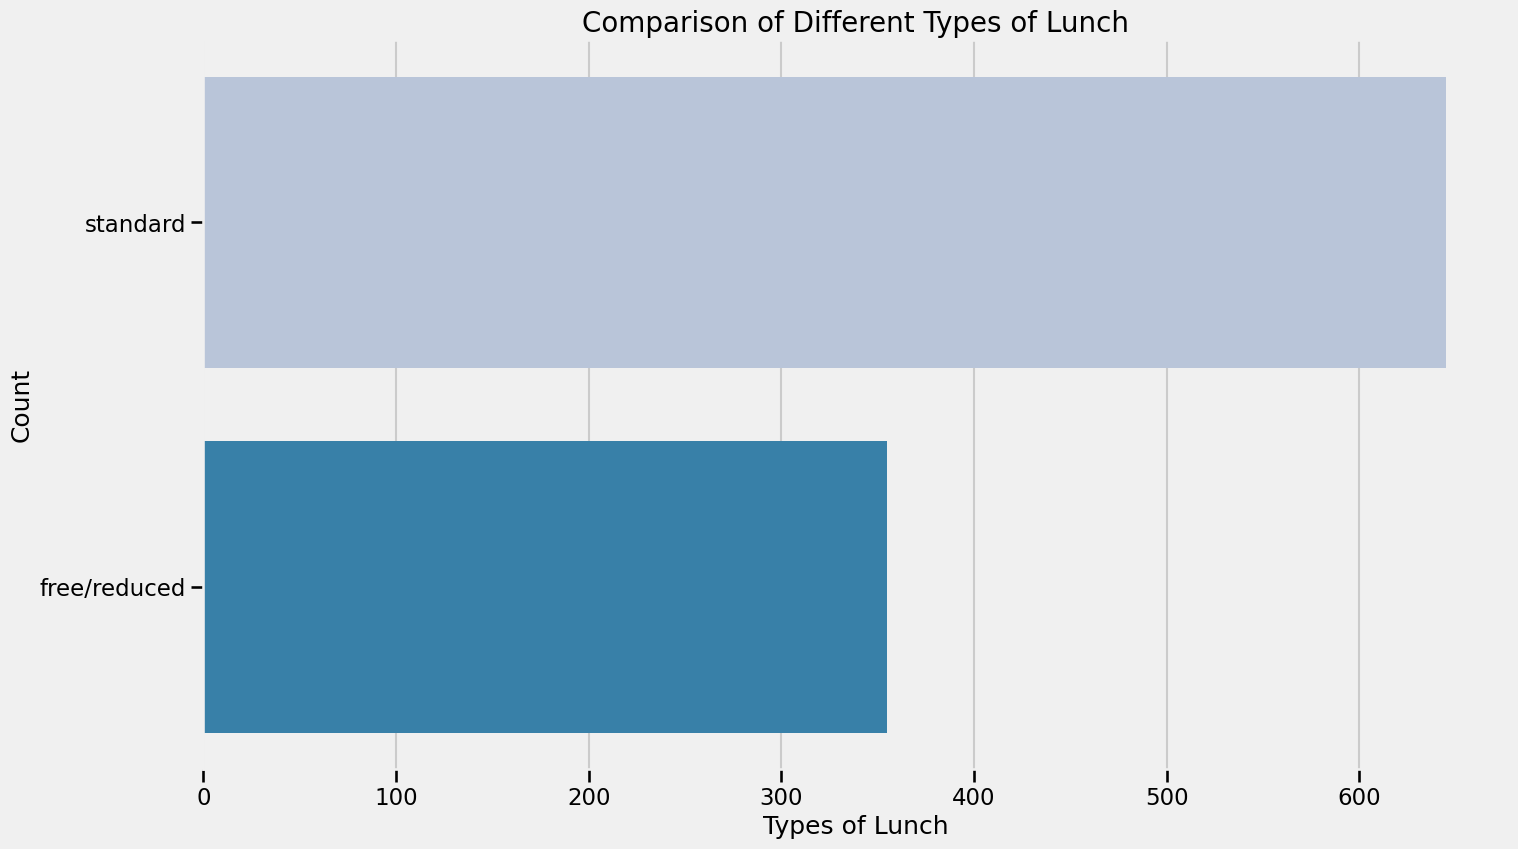

In [44]:
plt.rcParams['figure.figsize'] = (15,9)
sns.set_context("talk")
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of Different Types of Lunch',fontweight=30,fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

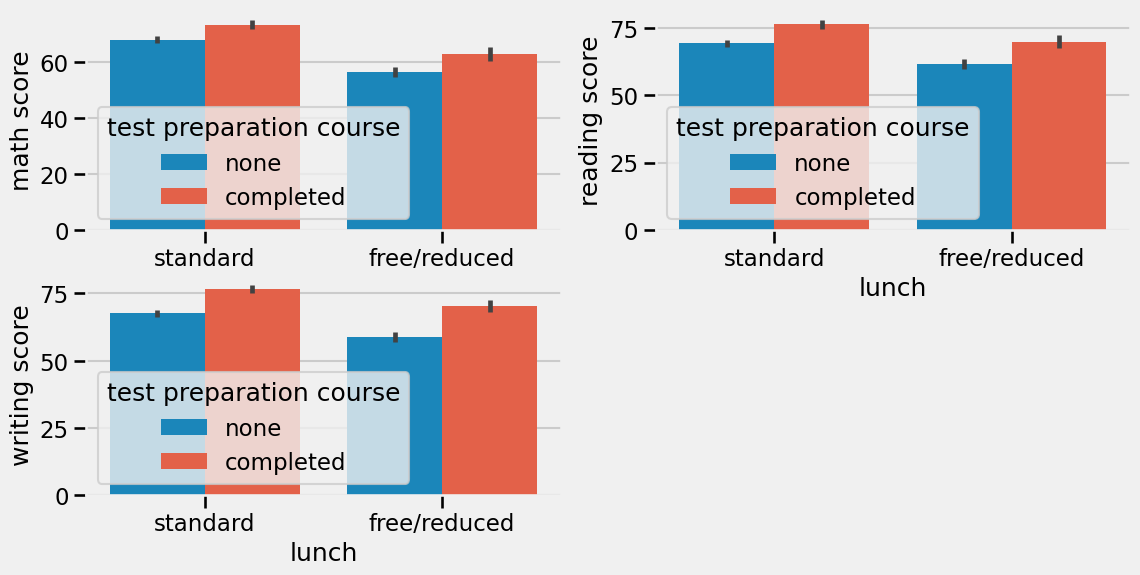

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])
plt.show()

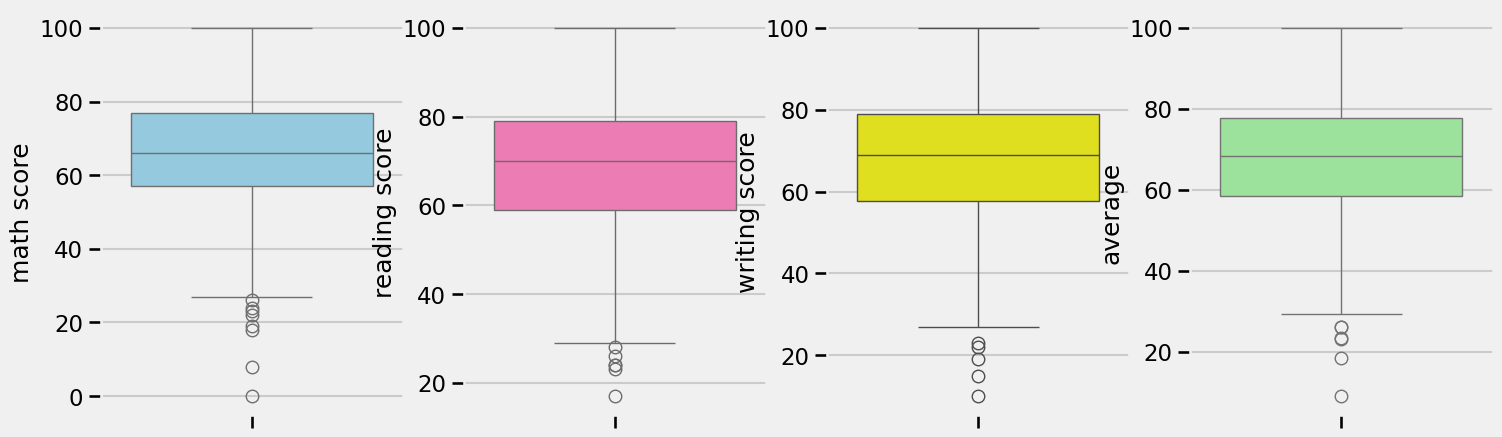

In [48]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Multivariate Analysis

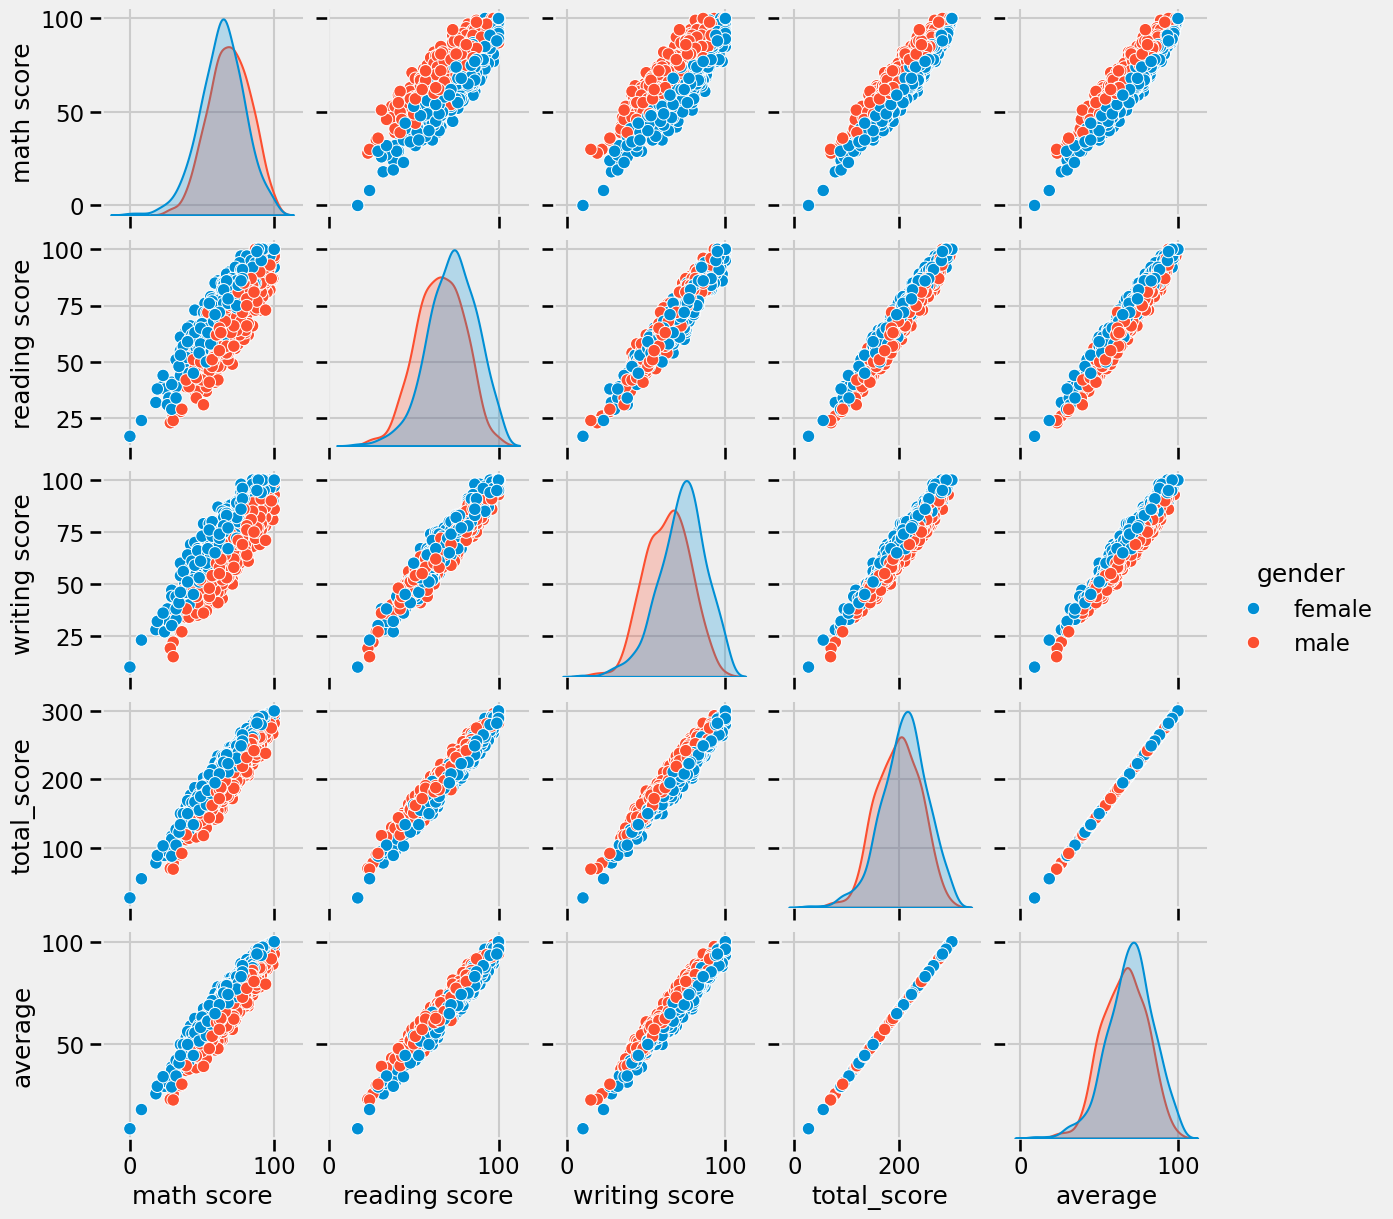

In [49]:
sns.pairplot(df,hue='gender')
plt.show()

### 5) Conclusions

#### - Student's performance is related with lunch, race, parental level education
#### - Females lead in pass percentage and also are top-scorers
#### - Finishing preparation course is benefitial